In [69]:
import pandas as pd
import ROOT as r
import numpy as np

In [70]:
df = pd.read_csv("../data/sena-sinan-sarp.txt", sep="\t", header=None, names=["second","voltage"])

In [71]:
def text_to_float(x):
    return float(x.replace(",","."))

In [72]:
df["second"] = df["second"].apply(text_to_float)
df["voltage"] = df["voltage"].apply(text_to_float)

In [73]:
df

,second,voltage
0,0.0,-0.33126
1,2.0,-0.33322
2,4.0,-0.33410
3,6.0,-0.33463
4,8.0,-0.33527
...,...,...
1788,3576.0,-0.32652
1789,3578.0,-0.32627
1790,3580.0,-0.32836
1791,3582.0,-0.32872



****************************************
Minimizer is Minuit / Migrad
Chi2                      =   0.00206657
NDf                       =          297
Edm                       =  1.28374e-07
NCalls                    =          116
p0                        =    -0.333041   +/-   0.000154821 
p1                        =     0.138271   +/-   0.00021368  
p2                        =    0.0424743   +/-   9.34696e-06 
p3                        =     -2.40574   +/-   0.0196062   

****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0015998
NDf                       =          261
Edm                       =  6.48583e-07
NCalls                    =          646
p0                        =    -0.311599   +/-   0.000153276 
p1                        =       11.133   +/-   0.462904    
p2                        =    0.0413162   +/-   1.71332e-05 
p3                        =     -6.08133   +/-   0.0455656   
p4                        =   0.00

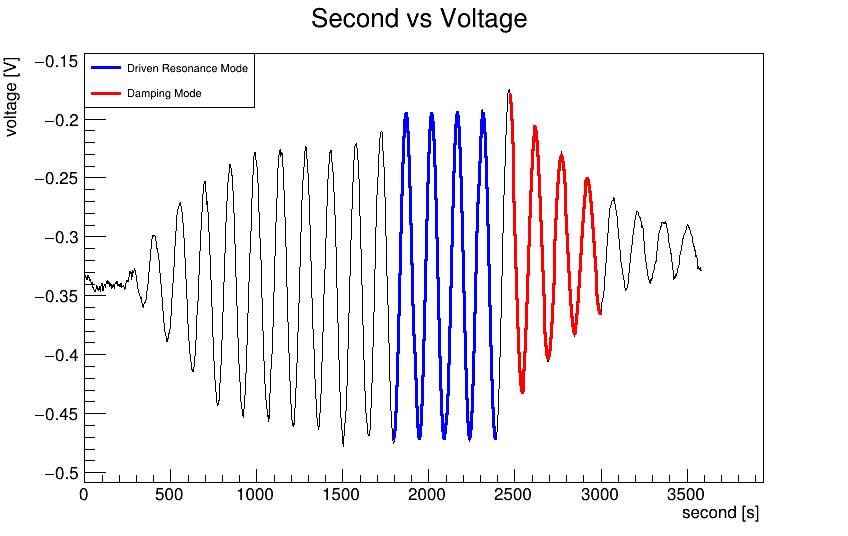

In [74]:
#plot second vs voltage in root
c = r.TCanvas()
c.SetWindowSize(1000,600)
gr = r.TGraphErrors(len(df), df["second"].values, df["voltage"].values)
gr.SetTitle("Second vs Voltage")
gr.GetXaxis().SetTitle("second [s]")
gr.GetYaxis().SetTitle("voltage [V]")

f_1 = r.TF1("sin", "[0]+[1]*TMath::Sin([2]*x+[3])",1790,2390)
f_1.SetParameters(-0.34,0.25,0.04,0)
f_1.SetLineWidth(3)
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1,"R")

f_2 = r.TF1("sin", "[0]+[1]*exp(-[4]*(x))*TMath::Sin([2]*(x)+[3])",2470,3000)
f_2.SetParameters(-0.34,0.1,0.04,0,0.00001)
f_2.SetLineWidth(3)
f_2.SetLineColor(r.kRed)
gr.Fit(f_2,"R+")

#add legend
legend = r.TLegend(0.1,0.8,0.3,0.9)
legend.AddEntry(f_1,"Driven Resonance Mode","l")
legend.AddEntry(f_2,"Damping Mode","l")

gr.Draw("AL")
c.Draw("AL")
legend.Draw("same")

In [24]:
#define parameters
I = 1.43*(10**(-4))
b = 0.0461025
d = 0.066653
M = 1.0385
m = 0.014573
L = 1.55
S = (21.5-18.7)/100

In [48]:
#get fit parameters
w_o = f_1.GetParameter(2)
phi_1 = f_1.GetParameter(3)
A = f_1.GetParameter(0)
B = f_1.GetParameter(1)

w_d = f_2.GetParameter(2)
phi_2 = f_2.GetParameter(3)
C = f_2.GetParameter(0)
D = f_2.GetParameter(1)
E = f_2.GetParameter(4)

A_err = f_1.GetParError(0)
B_err = f_1.GetParError(1)
C_err = f_2.GetParError(0)
D_err = f_2.GetParError(1)
E_err = f_2.GetParError(4)
w_o_err = f_1.GetParError(2)
w_d_err = f_2.GetParError(2)
phi_1_err = f_1.GetParError(3)
phi_2_err = f_2.GetParError(3)

In [51]:
#put fit parameters into a dataframe for f_1 and f_2
df_f1 = pd.DataFrame({"parameter":["A","B","w_o","phi"],"value":[A,B,w_o,phi_1],"error":[A_err,B_err,w_o_err,phi_1_err]})
df_f2 = pd.DataFrame({"parameter":["C","D","E","w_d","phi"],"value":[C,D,E,w_d,phi_2],"error":[C_err,D_err,E_err,w_d_err,phi_2_err]})

In [75]:
df_f1

,parameter,value,error
0,A,-0.333041,0.000155
1,B,0.138271,0.000214
2,w_o,0.042474,0.000009
3,phi,-2.405744,0.019606


In [76]:
df_f2

,parameter,value,error
0,C,-0.311599,0.000153
1,D,11.133009,0.462904
2,E,0.001780,0.000016
3,w_d,0.041316,0.000017
4,phi,-6.081334,0.045566


In [77]:
G = S/(2 * L * np.abs(B)) * (I * (w_o**2) * np.abs(A-C) * (b**2)) / (2 * d * M * m)

In [80]:
G

3.806744586655213e-10

In [81]:
sigma = 1.64*10**(-8)

In [82]:
#value of universal gravitation constant
G_u = 6.67408*10**(-11)

In [83]:
(G_u-G)/sigma

-0.019142296260092766

# Earth Mass

In [84]:
(9.81*(6731*10**3)**2)/(G)